In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML

base_folder = ".." # opendc-experiments-metamodel/src/main

# Read and explore output file

In [140]:
path = f"{base_folder}/output/host/topology=multi/workload=bitbrains-small/seed=0/"

def read_topology(topology_name):
    print(f"Topology name: {topology_name}")
    df = pd.read_csv(f"{base_folder}/resources/env/{topology_name}.txt", delimiter=";") # e.g., simple.txt
    display(HTML(df.to_html()))
    
# read_topology("single")
read_topology("multi")

Topology name: multi


,ClusterID,ClusterName,Cores,Speed,Memory,numberOfHosts,memoryCapacityPerHost,coreCountPerHost
0,A01,A01,32,3.20,2048,1,256,32
1,B01,B01,48,2.93,1256,6,64,8
2,C01,C01,32,3.20,2048,2,128,16


In [141]:
def mean_of_chunks(series, chunk_size):
    # Explicitly setting numeric_only to True to avoid FutureWarning about deprecation
    return series.groupby(np.arange(len(series)) // chunk_size).mean(numeric_only=True)

# Output data in host

In [142]:
"""
We extract and analyze the data exported in the .parquet, from the host, as a very first step towards creating a metamodel
"""

df_trace_1 = pd.read_parquet(path + "3-multis-active-servers.parquet")
df_trace_2 = pd.read_parquet(path + "3-multis-active-servers-inv.parquet")
df_trace_3 = pd.read_parquet(path + "3-multis-mem.parquet")
df_trace_4 = pd.read_parquet(path + "3-multis-mem-inv.parquet")
df_trace_5 = pd.read_parquet(path + "3-multis-core-mem.parquet")
df_trace_6 = pd.read_parquet(path + "3-multis-core-mem-inv.parquet")
df_trace_7 = pd.read_parquet(path + "3-multis-random.parquet")


In [143]:
df_trace_1 = mean_of_chunks(df_trace_1, 1000)
df_trace_2 = mean_of_chunks(df_trace_2, 1000)
df_trace_3 = mean_of_chunks(df_trace_3, 1000)
df_trace_4 = mean_of_chunks(df_trace_4, 1000)
df_trace_5 = mean_of_chunks(df_trace_5, 1000)
df_trace_6 = mean_of_chunks(df_trace_6, 1000)
df_trace_7 = mean_of_chunks(df_trace_7, 1000)

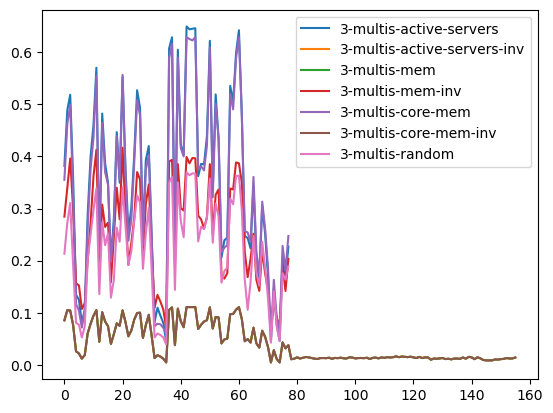

In [145]:
"""
Up to this point, we read the data from the .parquet file
"""

# todo revise: something here doesn't work? or maybe it does?
df_trace_1.cpu_utilization.plot()
df_trace_2.cpu_utilization.plot()
df_trace_3.cpu_utilization.plot()
df_trace_4.cpu_utilization.plot()
df_trace_5.cpu_utilization.plot()
df_trace_6.cpu_utilization.plot()
df_trace_7.cpu_utilization.plot()


plt.legend(["3-multis-active-servers", "3-multis-active-servers-inv", "3-multis-mem", "3-multis-mem-inv", "3-multis-core-mem", "3-multis-core-mem-inv", "3-multis-random"])
plt.show()